# Recurrent Neural Network

Recurrent neural networks (RNN) have autoregressive layers. They are suitable for natural language processing (NLP) and time series modelling, though for the former they have been supplanted by Transformer-based models in recent years.

Several things to note when using RNN:
1. **Samples must have the same number of features**. 
   Truncate or pad each sample as needed.
2. **RNN is slow to train**. 
   Start with a small subsample of data
   move to the full data only after you verify that your model is working.


## Text Data

We will use the IMDB to illustrate how to use a RNN for natural language processing. 

### A. Load Data

We first load the IMDB data then process it. The two most important processing we will apply are:
1. *How many unique words to keep?* Words that are too infrequent should be ignored because there will not be enough data to figure out their meaning. All such words will be converted to a special out-of-vocabulary character.
2. *How many features?* In the context of NLP, this translates to how many words each sample are allowed to have. Longer sequences are truncated while shorter ones are padded with a special character, usually `0`.

We will also take a random subsample of data to speed up training in class.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.utils import resample

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# Resample
x_train,y_train,x_test,y_test = resample(x_train,y_train,
                                         x_test,y_test,
                                         n_samples=1000)

# Data processing
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

### B. Model

Now we build our model. The model has the following structure:

1. Input
2. Embedding layer
3. Recurrent layers
4. Fully-connected layers
5. Output

An embedding layer translates each word into a vector, allowing much richer representation of the meaning of each word than just a single number. The initial translation is random, but the layer will learn through back propagation just like any other layer in the model.

#### Standard RNN

First, let us try standard RNN using Keras' `SimpleRNN` class:

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Embedding
from tensorflow.keras.layers import SimpleRNN

# Model
print('Build model...')
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = SimpleRNN(128, dropout=0.2)(x)
x = Dense(128)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 80)]              0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 80, 128)           2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 2,609,537
Trainable params: 2,609,537
Non-trainable params: 0
_________________________________________________________________
None
Train...
Epoch 1/15
32/32 [==============================] - 2s 54ms/step - loss: 0.7088 - accu

#### Long-Short Term Memory (LSTM)

Next we will try out the LSTM layer. We simply need to change `SimpleRNN` to `LSTM`:

In [15]:
from tensorflow.keras.layers import LSTM

# Model
print('Build model...')
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = LSTM(128, dropout=0.2)(x)
x = Dense(128)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 80)]              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 80, 128)           2560000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total params: 2,708,225
Trainable params: 2,708,225
Non-trainable params: 0
_________________________________________________________________
None
Train...
Epoch 1/15
32/32 [==============================] - 5s 124ms/step - loss: 0.6849 - acc

#### Bidirectional RNN

Finally, let us try out bi-directional LSTM. This can be done by enclosing the LSTM layer with `Bidirectional()`. 

Note that this will *double* the number of neurons in the targeted layer. Not only does this make training slower, it is also not a fair comparison with above because the number of parameters have increased by a lot. You should cut the number of neurons if you want a fair comparison.

In [16]:
from tensorflow.keras.layers import Bidirectional

# Model
print('Build model...')
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(128, dropout=0.2))(x)
x = Dense(128)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 80)]              0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 80, 128)           2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 2,856,193
Trainable params: 2,856,193
Non-trainable params: 0
_________________________________________________________________
None
Train...
Epoch 1/15
32/32 [==============================] - 9s 236ms/step - loss: 0.6800 - acc

In [13]:
from tensorflow.keras.layers import Bidirectional

# Model
print('Build model...')
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(64, dropout=0.2))(x)
x = Dense(128)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 2,675,457
Trainable params: 2,675,457
Non-trainable params: 0
_________________________________________________________________
None
Train...
Epoch 1/15
32/32 [==============================] - 5s 119ms/step - loss: 0.6902 - acc

### C. Hyperparameters Tuning

Hyperparameter tuning is necessary in order to get good performance.
The major hyperparameters you need to consider are:
- Size of the embedding (i.e. How long a vector do you need to represent each word?)
- Number of recurrent neurons
- Number of recurrent layers
- Number of fully-connected neurons
- Number of fully-connected layers
- Dropout rate
- Optimzer
- Number of epochs

Putting everything together:

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from sklearn.utils import resample
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Embedding
from tensorflow.keras.layers import LSTM, Bidirectional

# Settings
max_features = 20000 # How many words to keep?
maxlen = 80  # cut texts after this number of words
n_samples = 1000 # Running with full data takes a lot of time
batch_size = 32

# Load data
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
if (n_samples != None):
    x_train,y_train,x_test,y_test = resample(x_train,y_train,
                                             x_test,y_test,
                                             n_samples=n_samples)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Data processing
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Model
print('Build model...')
inputs = Input(shape=(maxlen,))
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(128, dropout=0.2))(x)
x = Dense(128)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

# Training
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

## Time Series Data

In this part will use RNN to predict stock index. 

First, load our data:

In [1]:
import numpy as np
import pandas as pd

# Import data
hsi = pd.read_csv("../Data/hsi.csv")
hsi["Date"] = pd.to_datetime(hsi["Date"])
hsi = hsi.dropna()
hsi

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,9982.259766,9982.259766,9764.980469,9809.169922,9809.169922,0.000000e+00
1,1999-01-05,9800.669922,9939.969727,9790.000000,9891.059570,9891.059570,0.000000e+00
2,1999-01-06,9967.429688,10233.799805,9967.429688,10233.799805,10233.799805,0.000000e+00
3,1999-01-07,10585.169922,10737.759766,10565.089844,10693.570313,10693.570313,0.000000e+00
4,1999-01-08,10713.150391,10898.250000,10687.790039,10722.700195,10722.700195,0.000000e+00
...,...,...,...,...,...,...,...
5087,2019-04-08,30119.580078,30185.060547,29913.619141,30077.150391,30077.150391,2.321012e+09
5088,2019-04-09,30065.990234,30222.019531,30018.980469,30157.490234,30157.490234,2.049354e+09
5089,2019-04-10,30052.269531,30139.609375,29892.619141,30119.560547,30119.560547,1.814064e+09
5090,2019-04-11,30138.140625,30184.609375,29783.669922,29839.449219,29839.449219,1.897154e+09


Next, we need to process our data. For each target $y_t$, the corresponding features are 
$x_t = \left[ y_{t-1},y_{t-2},...,y_{t-n} \right]$.
We can generate this by using pandas' `df.shift()` or Keras' [`timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array). 

In [24]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from sklearn import preprocessing

# How many lags do we use as features?
lag = 10

# Compute returns
data = (hsi["Adj Close"] /
         hsi.shift(1)["Adj Close"]
         - 1)
data = data.dropna()
data = data.to_numpy().reshape(-1,1)

# Standardize data
scalar = preprocessing.StandardScaler().fit(data)
data_std = scalar.transform(data).flatten()

input_data = data_std
target_data = data_std[lag:]

dataset = timeseries_dataset_from_array(
        input_data, target_data, 
        batch_size=128,
        sequence_length=lag)

for batch in dataset.take(1):
    input_b, target_b = batch  
print("Input shape:", input_b.numpy().shape)
print("Target shape:", target_b.numpy().shape)    

Input shape: (128, 10)
Target shape: (128,)


In [13]:
input_b

<tf.Tensor: shape=(128, 10), dtype=float64, numpy=
array([[ 0.54098242,  2.31621786,  3.00969911, ..., -0.61788798,
        -0.25925777,  1.67450094],
       [ 2.31621786,  3.00969911,  0.16139755, ..., -0.25925777,
         1.67450094, -0.75188983],
       [ 3.00969911,  0.16139755, -0.57905483, ...,  1.67450094,
        -0.75188983,  0.14020575],
       ...,
       [-0.04014516, -0.78517492, -0.41078794, ...,  0.74681239,
        -0.91936397, -0.27693616],
       [-0.78517492, -0.41078794, -1.97927179, ..., -0.91936397,
        -0.27693616, -1.41255082],
       [-0.41078794, -1.97927179,  0.8889224 , ..., -0.27693616,
        -1.41255082, -1.19344862]])>

Finally, our model. Two main difference when compared with NLP modelling:
1. No embedding layer. It is usually impossible to put one in because time series data is often continuously distributed.
2. No bidirectional layer. A bidirectional layer has access to both the past and the future, the latter we have no access to when it comes to actual inferencing.

In [31]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM

# Set up layers 
inputs = Input(shape=(10,1))
x = LSTM(10, activation='tanh')(inputs)
x = Dense(10, activation='tanh')(x)
predictions = Dense(1, activation='linear')(x)

# Set up model
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_squared_error',
              optimizer='adam')

print('Train...')
model.fit(dataset,
          epochs=200)


Train...
Epoch 1/200
39/39 [==============================] - 1s 15ms/step - loss: 0.9986
Epoch 2/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9971
Epoch 3/200
39/39 [==============================] - 0s 10ms/step - loss: 0.9962
Epoch 4/200
39/39 [==============================] - 0s 10ms/step - loss: 0.9954
Epoch 5/200
39/39 [==============================] - 0s 10ms/step - loss: 0.9945
Epoch 6/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9936
Epoch 7/200
39/39 [==============================] - 0s 8ms/step - loss: 0.9926
Epoch 8/200
39/39 [==============================] - 0s 8ms/step - loss: 0.9916
Epoch 9/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9905
Epoch 10/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9893
Epoch 11/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9881
Epoch 12/200
39/39 [==============================] - 0s 9ms/step - loss: 0.9868
Epoch 13/200
39/39 [====

Finally, Let us plot the prediction versus actual return:

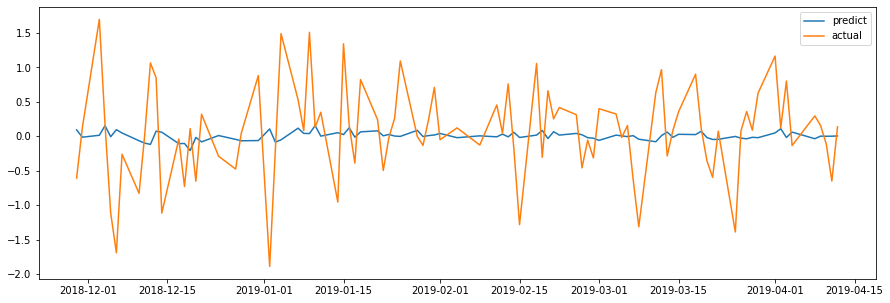

In [32]:
prediction_list = []
for batch in dataset:
    inputs, targets = batch  
    prediction_list.append(model.predict(inputs))
      
prediction = np.concatenate(prediction_list).flatten()
prediction = prediction[-90:]
actual = target_data[-1*len(prediction):].flatten()
dates = hsi["Date"].to_numpy()
dates = dates[-1*len(prediction):].flatten()

# Line Chart
import matplotlib.pyplot as plt
plt.plot(dates,prediction,label="predict") #First line
plt.plot(dates,actual,label="actual") #Second line
plt.rcParams["figure.figsize"] = (15,5) #Size
plt.legend() #Show legend
plt.show()

## Running on Cluster

Training will be faster if we use more CPU cores, but it will be *a lot* faster if we use a GPU. The two models we use in this notebook are available as `lstm-imdb.py` and `lstm-time-series.py` under the 'Examples' folder.

If you using the Department of Economics' SCRP HPC Cluster, you can run the IMDB example on a GPU by typing the following commands in a terminal:

```
conda activate tensorflow
gpu python [path]/lstm-imdb.py
```

This runs the script on the slowest available GPU on the cluster. This usually means a GTX 1050 Ti.
The speed up is going to be much more impressive if we use the fastest GPU available:
```
gpu ---gpus=rtx3090:1 python [path]/lstm-imdb.py

```

To do the same for the HSI time series example, simply change the filename to `lstm-time-series.py`.